<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/10_projeto_final/notebook/projeto_final_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final - Análise Exploratória

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

## Dado

| Variable | Description |
| :-- | :-- |
| Patient_ID | Unique identifier |
| Age | Patient's age |
| Gender | Male, Female, or Other |
| Country/Region | Country or region of the patient |
| Year | From 2015 to 2024 |
| Genetic_Risk | Risk factor, 0 to 10 |
| Air_Pollution	| Risk factor, 0 to 10 |
| Alcohol_Use | Risk factor, 0 to 10 |
| Smoking | Risk factor, 0 to 10 |
| Obesity_Level | Risk factor, 0 to 10 |
| Cancer Type | Various types of cancer (e.g., Breast, Lung, Colon) |
| Cancer Stage | Stage 0 to Stage IV |
| Treatment Cost | Estimated cost of cancer treatment (in USD) |
| Survival Years | Years survived since diagnosis |
| Target Severity Score | A composite score representing cancer severity, 0 to 10 |

In [2]:
df_cancer = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Projeto Final/global_cancer_patients_2015_2024.csv')
df_cancer.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [3]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [4]:
df_cancer_ = df_cancer.copy()

In [5]:
df_cancer_ = df_cancer_.query('not (Gender == "Male" and Cancer_Type == "Cervical")')

In [6]:
df_cancer_ = df_cancer_.query('not (Gender == "Female" & Cancer_Type == "Prostate")')

## EDA

In [7]:
df_cancer_.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000,45859.000000
mean,54.421771,2019.484529,5.006167,5.017578,5.006806,4.994727,4.989982,52506.983241,5.002320,4.952683
std,20.224541,2.872742,2.887177,2.889984,2.884805,2.881860,2.893804,27365.036029,2.882827,1.200205
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28720.345000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52511.360000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76273.205000,7.500000,5.790000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [8]:
df_cancer_['Patient_ID'].is_unique

True

In [9]:
np.sort(df_cancer_['Year'].unique())

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [10]:
df_cancer_['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df_cancer_['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical', 'Liver',
       'Prostate'], dtype=object)

In [12]:
df_cancer_['Cancer_Stage'].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [13]:
country_group = df_cancer_[['Patient_ID', 'Country_Region']]\
                .groupby('Country_Region').count()\
                .rename(columns={'Patient_ID':'Total_Patients'})\
                .sort_values(by='Total_Patients', ascending=False)\
                .reset_index()
country_group

,Country_Region,Total_Patients
0,Australia,4712
1,USA,4668
2,Germany,4623
3,UK,4622
4,Russia,4593
5,India,4581
6,Brazil,4579
7,Pakistan,4551
8,China,4477
9,Canada,4453


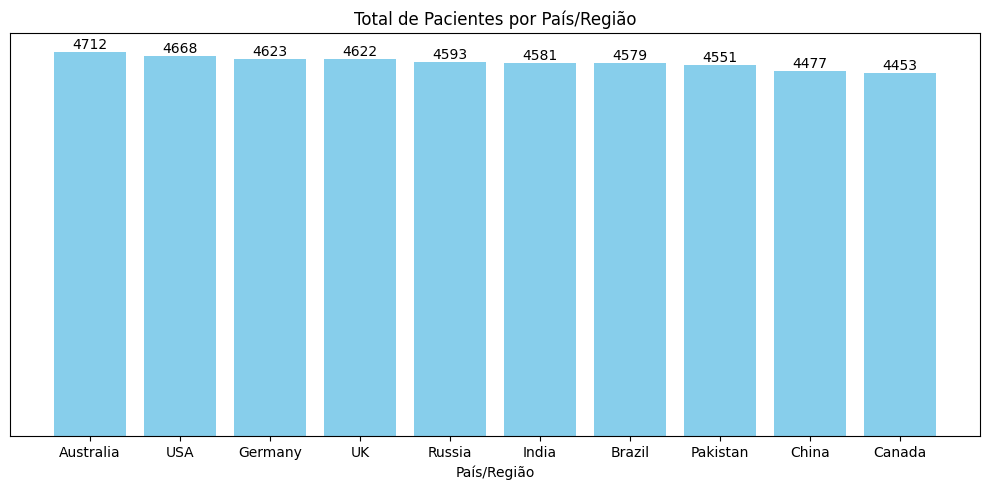

In [14]:
plt.figure(figsize=(10, 5))
bars = plt.bar(country_group['Country_Region'], country_group['Total_Patients'], color='skyblue')

# adiciona os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 para afastar um pouco
             str(height), ha='center', va='bottom', fontsize=10)

# eixo y: remove os ticks e os valores
plt.yticks([])

plt.xlabel('País/Região')
plt.title('Total de Pacientes por País/Região')
plt.tight_layout()
plt.show()

In [15]:
year_group = df_cancer_[['Patient_ID', 'Year']].groupby('Year').count()\
.rename(columns={'Patient_ID':'Total_Patients'}).sort_values(by='Year', ascending=True)
year_group

,Total_Patients
Year,
2015,4601
2016,4655
2017,4629
2018,4495
2019,4636
2020,4679
2021,4561
2022,4481
2023,4512


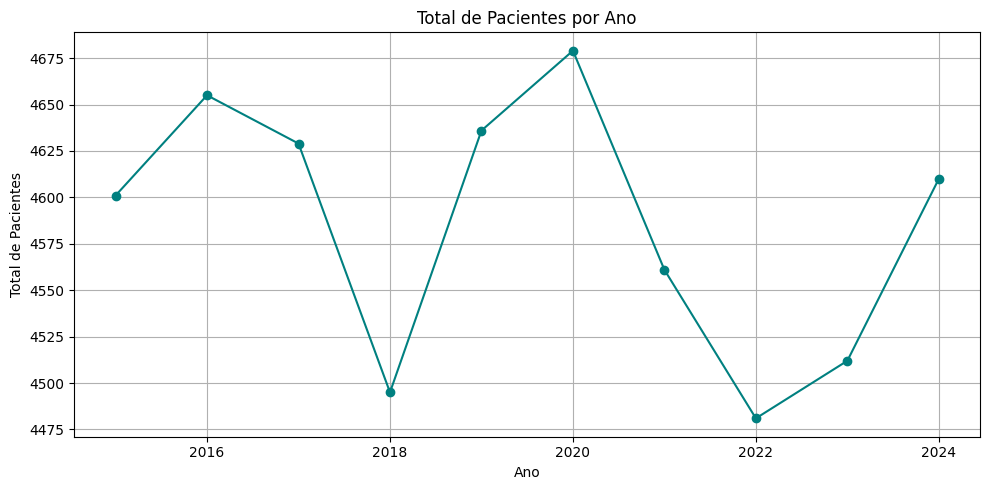

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(year_group.index, year_group['Total_Patients'], marker='o', linestyle='-', color='teal')
plt.xlabel('Ano')
plt.ylabel('Total de Pacientes')
plt.title('Total de Pacientes por Ano')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
bins = [20, 30, 40, 50, 60, 70, 80, 90]  # limits
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

df_cancer_['age_range'] = pd.cut(df_cancer_['Age'], bins=bins, labels=labels, right=False) # includes the lower limit and excludes the upper limit [20, 30)
df_cancer_['age_range'].sample(5)

,age_range
44878,60-69
28827,20-29
37583,20-29
24534,70-79
6577,50-59


In [18]:
gender_group = df_cancer_[['Patient_ID', 'Gender']]\
              .groupby('Gender').count()\
              .rename(columns={'Patient_ID':'Total_Patients'})\
              .sort_values(by='Total_Patients', ascending=False)\
              .reset_index()
gender_group

,Gender,Total_Patients
0,Other,16495
1,Male,14768
2,Female,14596


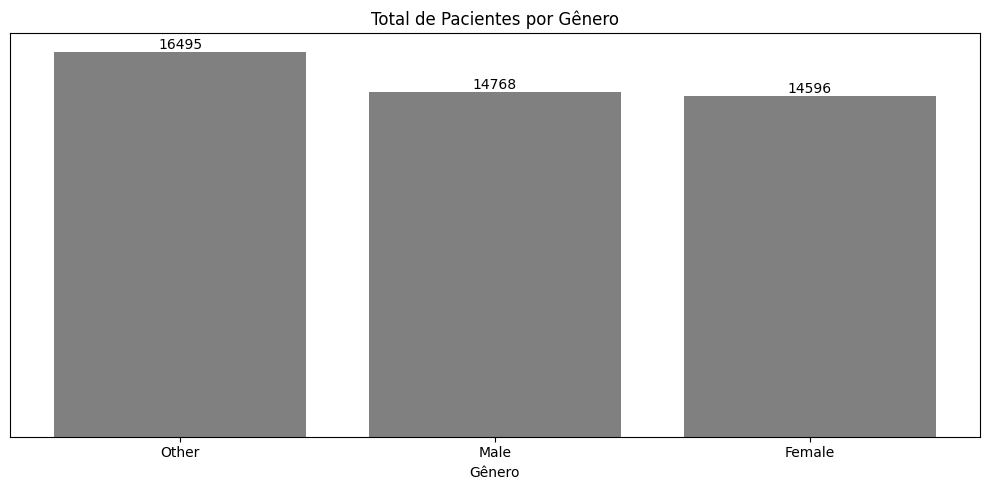

In [19]:
plt.figure(figsize=(10, 5))
bars = plt.bar(gender_group['Gender'], gender_group['Total_Patients'], color='gray')

# adiciona os valores acima das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,  # +1 para afastar um pouco
             str(height), ha='center', va='bottom', fontsize=10)

# eixo y: remove os ticks e os valores
plt.yticks([])

plt.xlabel('Gênero')
plt.title('Total de Pacientes por Gênero')
plt.tight_layout()
plt.show()


In [20]:
gender_age_type_group = df_cancer_[['Patient_ID', 'Gender', 'age_range', 'Cancer_Type']]\
                        .groupby(['Gender', 'age_range', 'Cancer_Type'], observed=False).count()\
                        .rename(columns={'Patient_ID':'Total_Patients'})\
                        .reset_index()
gender_age_type_group

,Gender,age_range,Cancer_Type,Total_Patients
0,Female,20-29,Breast,302
1,Female,20-29,Cervical,294
2,Female,20-29,Colon,303
3,Female,20-29,Leukemia,318
4,Female,20-29,Liver,336
...,...,...,...,...
163,Other,80-89,Leukemia,303
164,Other,80-89,Liver,301
165,Other,80-89,Lung,318
166,Other,80-89,Prostate,315


In [21]:
fig = px.density_heatmap(
    gender_age_type_group,
    x='age_range',
    y='Cancer_Type',
    z='Total_Patients',
    facet_col='Gender',
    color_continuous_scale='Viridis_r',
    title='Heatmap de Pacientes por Gênero, Faixa Etária e Tipo de Câncer'
)
fig.show()


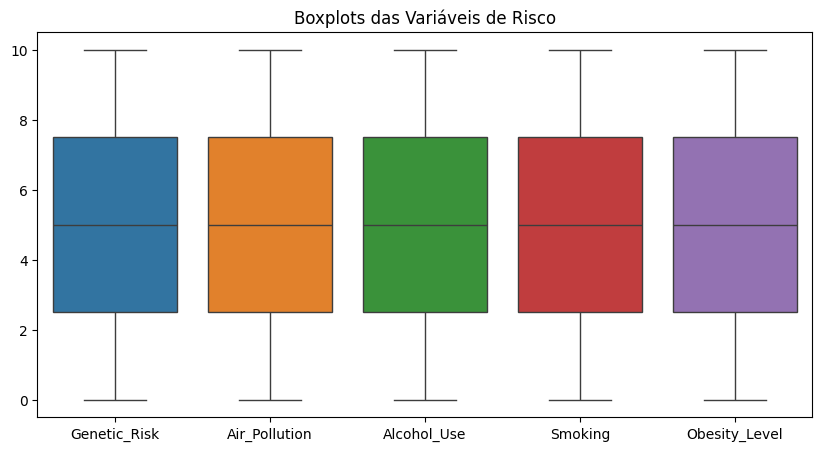

In [22]:
risk_cols = ['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cancer_[risk_cols])
# plt.xticks(rotation=45)
plt.title('Boxplots das Variáveis de Risco')
plt.show()


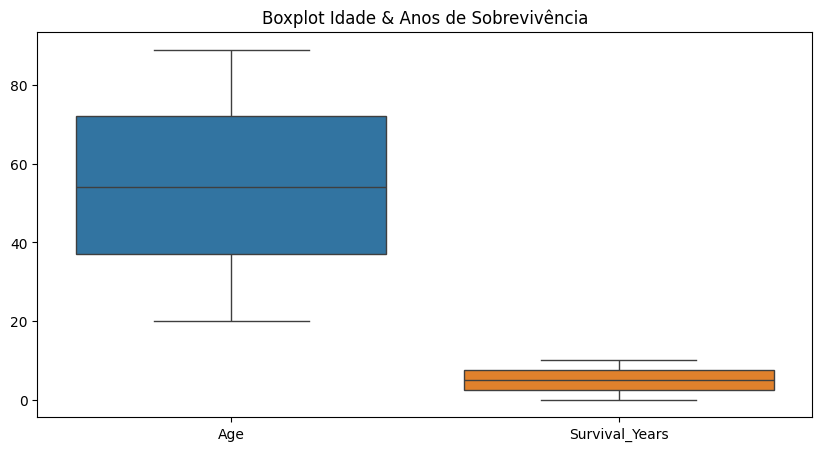

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_cancer_[['Age', 'Survival_Years']])
# plt.xticks(rotation=45)
plt.title('Boxplot Idade & Anos de Sobrevivência')
plt.show()

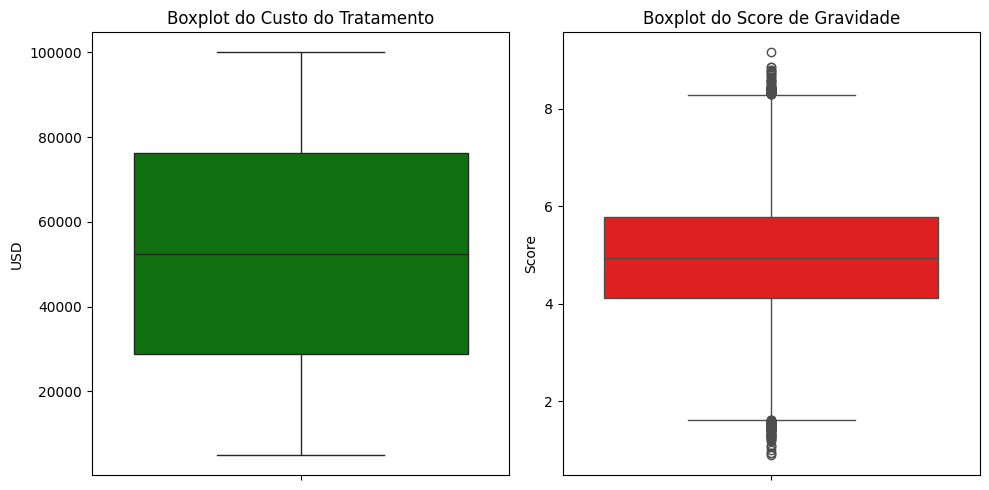

In [24]:
# 2 subplots em 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 linha, 2 colunas

sns.boxplot(y=df_cancer_['Treatment_Cost_USD'], ax=axes[0], color='green')
axes[0].set_title('Boxplot do Custo do Tratamento')
axes[0].set_ylabel('USD')

sns.boxplot(y=df_cancer_['Target_Severity_Score'], ax=axes[1], color='red')
axes[1].set_title('Boxplot do Score de Gravidade')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()


In [25]:
df_grouped = df_cancer_.groupby(['Country_Region', 'Year'], observed=False)['Patient_ID'].count().reset_index()
df_grouped.rename(columns={'Patient_ID': 'Total_Patients'}, inplace=True)

fig = px.choropleth(
    df_grouped,
    locations='Country_Region',
    locationmode='country names',
    color='Total_Patients',
    animation_frame='Year',  # cria o controle de tempo por ano
    color_continuous_scale='Reds',
    title='Incidência de Pacientes com Câncer por País e Ano',
    labels={'Total_Patients': 'Total de Pacientes'}
)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


In [26]:
df_time = df_cancer_.groupby(['Year', 'Country_Region'], observed=False)['Patient_ID'].count().reset_index()
df_time.rename(columns={'Patient_ID': 'Total_Patients'}, inplace=True)

fig = px.line(
    df_time,
    x='Year',
    y='Total_Patients',
    color='Country_Region',
    markers=True,
    title='Série Temporal de Pacientes com Câncer por País',
    labels={'Total_Patients': 'Total de Pacientes'}
)
fig.show()


In [27]:
# download data
df_cancer_.to_csv('/content/drive/My Drive/WoMakersCode/Bootcamp S&P Global/Projeto Final/global_cancer_patients_2015_2024_cleaned.csv', index=False)